# **AI_Generated VS Real Image Classifier**

## Basic Setup

In [23]:
# Importing all necessary libraries

import tensorflow as tf
import os
import cv2
# import imghdr
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [24]:
# # Checking for gpus

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

# print(gpus)

In [25]:
# pip install opencv-python

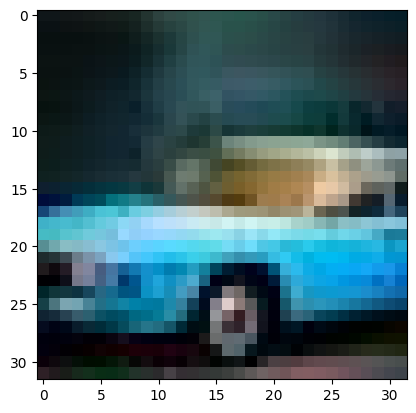

In [26]:
# reading a single image

img = cv2.imread(os.path.join('data', 'FAKE', '1001 (2).jpg'))
plt.imshow(img)

## Loading dataset

In [27]:
# loaded dataset from given directory and created an data object having batch size of 32

data = tf.keras.utils.image_dataset_from_directory('DATA', image_size=(32, 32))

Found 20020 files belonging to 2 classes.


In [28]:
# Created an iterable numpy array of dataset

data_it = data.as_numpy_iterator()

In [29]:
# checking for a single element of data_it object
# batch variable contains a batch of 32 images 
# it is basically a tuple with numpy arrays of 32 images as first element and their labels as second element

batch = data_it.next()
print(batch[0].shape)
print(batch)

(32, 32, 32, 3)
(array([[[[ 19.,  15.,   6.],
         [ 19.,  15.,   6.],
         [ 21.,  17.,   6.],
         ...,
         [  0.,   4.,   5.],
         [  0.,   3.,   6.],
         [  0.,   1.,   5.]],

        [[ 15.,  11.,   2.],
         [ 16.,  12.,   3.],
         [ 18.,  14.,   5.],
         ...,
         [  6.,   6.,   6.],
         [  3.,   4.,   6.],
         [  0.,   3.,   6.]],

        [[  9.,   6.,   0.],
         [ 11.,   8.,   1.],
         [ 14.,  11.,   4.],
         ...,
         [ 12.,   8.,   5.],
         [  7.,   6.,   4.],
         [  4.,   3.,   1.]],

        ...,

        [[  1.,   0.,   0.],
         [  1.,   0.,   0.],
         [  3.,   2.,   0.],
         ...,
         [  0.,   1.,   2.],
         [  2.,   4.,   3.],
         [  0.,   0.,   0.]],

        [[  2.,   1.,   0.],
         [  7.,   6.,   1.],
         [  4.,   3.,   0.],
         ...,
         [ 46.,  50.,  51.],
         [ 54.,  56.,  55.],
         [ 48.,  48.,  46.]],

        [[  1.,   0

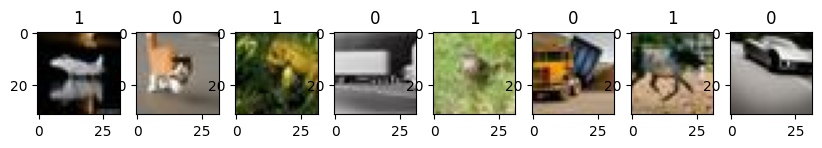

In [30]:
# Plotting eight images from batch

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Data Preprocessing

In [31]:
# checking for scales of pixels

print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [32]:
# scalling all pixels values between 0 and 1 and applying it on whole dataset

data = data.map(lambda x, y : (x/255, y))

In [33]:
# again creating an iterable numpy array of scaled dataset

scaled_it = data.as_numpy_iterator()

In [34]:
# creating fractions for splitting dataset into train, test and validation

train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [35]:
# checking if fraction size is valid or not 

train_size+cv_size+test_size == len(data)

True

In [36]:
# creating train, test and validatio dataset

train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [37]:
# function for data augmantations

def augmant_data(x,y):
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)
    x = tf.image.random_brightness(x, max_delta=0.1)
    x = tf.image.random_contrast(x, lower=0.9, upper=1.1)

    return x,y

In [38]:
# applying data augmantations

train_augmanted_data = train.map(augmant_data)

## Model Building

In [39]:
# importing necessary libraries for model building 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
# building my own architecture

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          4128      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 32)         

In [42]:
# model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (4, 4), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (4, 4), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [43]:
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# model = Sequential() 
# model.add(base_model)
# model.add(Flatten())

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [44]:
# model.summary()

In [45]:
# logdir = 'logs'

In [46]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
# from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# from tensorflow.keras.optimizers import Adam

# initial_learning_rate = 0.001

# def lr_scheduler(epochs, lr):
#     return lr*0.95

# lr_schedule = LearningRateScheduler(lr_scheduler)
# optimizer = Adam(learning_rate=initial_learning_rate)
# early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [49]:
model.compile(optimizer=Adam(), loss = BinaryCrossentropy(), metrics=['accuracy', Precision(), Recall()])

In [50]:
hist = model.fit(train_augmanted_data, epochs=20, validation_data=cv)

Epoch 1/20


2024-08-20 09:42:54.622727: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-08-20 09:42:54.897561: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-20 09:42:55.906790: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9e74063a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-20 09:42:55.906850: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-08-20 09:42:55.922782: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1724127176.005021    1467 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/438 [==============================] - 8s 11ms/step - loss: 0.4806 - accuracy: 0.7655 - precision_1: 0.7725 - recall_1: 0.7532 - val_loss: 0.4185 - val_accuracy: 0.8058 - val_precision_1: 0.7379 - val_recall_1: 0.9485
Epoch 2/20
438/438 [==============================] - 5s 11ms/step - loss: 0.3695 - accuracy: 0.8392 - precision_1: 0.8322 - recall_1: 0.8504 - val_loss: 0.3040 - val_accuracy: 0.8765 - val_precision_1: 0.9133 - val_recall_1: 0.8347
Epoch 3/20
438/438 [==============================] - 5s 11ms/step - loss: 0.3351 - accuracy: 0.8584 - precision_1: 0.8550 - recall_1: 0.8632 - val_loss: 0.3015 - val_accuracy: 0.8780 - val_precision_1: 0.9133 - val_recall_1: 0.8358
Epoch 4/20
438/438 [==============================] - 5s 11ms/step - loss: 0.3128 - accuracy: 0.8647 - precision_1: 0.8635 - recall_1: 0.8670 - val_loss: 0.2704 - val_accuracy: 0.8892 - val_precision_1: 0.9074 - val_recall_1: 0.8681
Epoch 5/20
438/438 [==============================] - 5s 11ms/step - loss: 0.30

## Model Evaluation

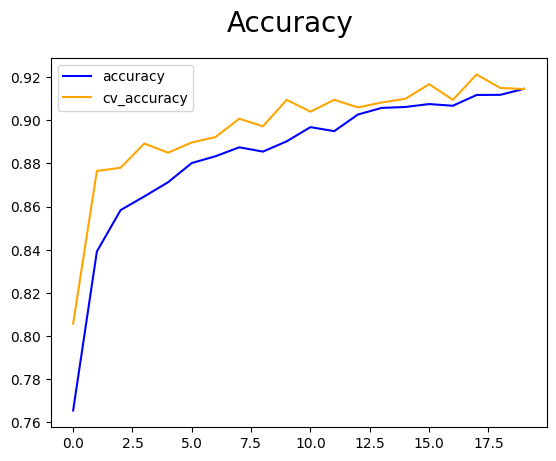

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

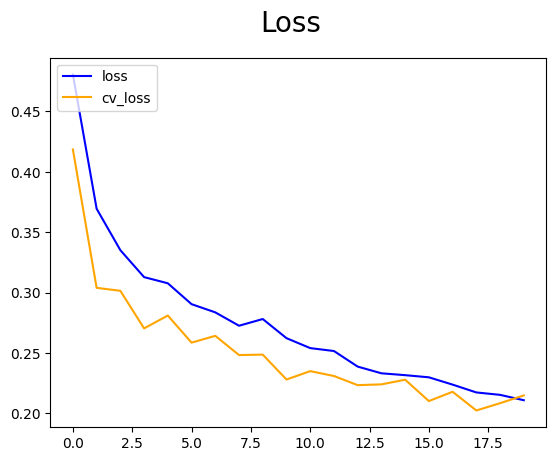

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 15ms/step


In [59]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9352051615715027, Recall: 0.8760748505592346, Accuracy: 0.9089321494102478


In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('model','ai_imageclassifier'), save_format='tf')

INFO:tensorflow:Assets written to: model/ai_imageclassifier/assets


INFO:tensorflow:Assets written to: model/ai_imageclassifier/assets


In [48]:
model = load_model(os.path.join('model','ai_imageclassifier'))

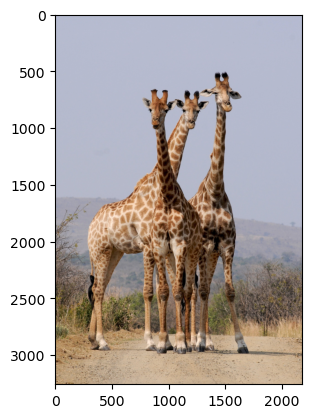

In [77]:
img = cv2.imread('test_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [78]:
resize = tf.image.resize(img, (32, 32))

In [79]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [80]:
y_pred

array([[2.0967873e-05]], dtype=float32)

In [81]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI


In [82]:
print(resize)

tf.Tensor(
[[[182.40625  187.40625  207.40625 ]
  [180.40625  187.40625  206.40625 ]
  [181.       186.       206.      ]
  ...
  [182.       187.       207.      ]
  [182.40625  187.40625  207.40625 ]
  [180.5625   184.5625   209.5625  ]]

 [[181.       188.       207.      ]
  [183.       188.       208.      ]
  [182.       187.       209.      ]
  ...
  [182.       186.       211.      ]
  [184.375    187.3125   210.      ]
  [182.       187.       209.      ]]

 [[183.       188.       208.      ]
  [183.       188.       210.      ]
  [182.       187.       207.      ]
  ...
  [183.       188.       210.      ]
  [182.       187.       207.      ]
  [181.       186.       206.      ]]

 ...

 [[157.92578  117.92578   81.92578 ]
  [164.62695  127.62695   85.62695 ]
  [210.1289   175.14844  143.06055 ]
  ...
  [175.38086  155.38086  131.38086 ]
  [189.34375  159.30078  134.63477 ]
  [ 69.302734  57.396484  41.365234]]

 [[186.2832   153.2832   111.8457  ]
  [178.50781  154.19531  1